In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import datetime
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
data = pd.read_csv("Traffic_Crashes_-_Crashes.csv")
data.head()

,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,JC334993,NaN,07/04/2019 10:33:00 PM,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,NaN,NaN,NaN,NaN,22,5,7,41.886140,-87.614274,POINT (-87.614274106164 41.8861404879)
1,JC370822,NaN,07/30/2019 10:22:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),...,NaN,NaN,NaN,NaN,10,3,7,41.745549,-87.614670,POINT (-87.614669906271 41.745549113377)
2,JC387098,NaN,08/10/2019 05:00:00 PM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,...,NaN,NaN,NaN,NaN,17,7,8,41.772004,-87.581234,POINT (-87.58123401629 41.772004323752)
3,JC395195,NaN,08/16/2019 04:53:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,0.0,1.0,0.0,16,6,8,41.892327,-87.635742,POINT (-87.635741843096 41.89232650689)
4,JC396604,NaN,08/17/2019 04:04:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,...,0.0,0.0,1.0,0.0,16,7,8,41.948637,-87.688458,POINT (-87.688457506457 41.948636883802)


In [4]:
df = data

In [5]:
df.shape

(363249, 48)

In [6]:
df.drop(columns=['RD_NO','CRASH_DATE_EST_I','TRAFFIC_CONTROL_DEVICE','DEVICE_CONDITION','LANE_CNT',
                 'REPORT_TYPE','INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I',
                 'DATE_POLICE_NOTIFIED', 'STREET_NO', 'STREET_DIRECTION','STREET_NAME', 'BEAT_OF_OCCURRENCE',
                 'PHOTOS_TAKEN_I','STATEMENTS_TAKEN_I','DOORING_I', 'WORK_ZONE_I' ,
                 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL',
                 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
                 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'LOCATION'
                ], inplace = True)

In [7]:
df.head()

,CRASH_DATE,POSTED_SPEED_LIMIT,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
0,07/04/2019 10:33:00 PM,45,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",FOLLOWING TOO CLOSELY,NOT APPLICABLE,22,5,7,41.886140,-87.614274
1,07/30/2019 10:22:00 AM,30,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,IMPROPER TURNING/NO SIGNAL,10,3,7,41.745549,-87.614670
2,08/10/2019 05:00:00 PM,25,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",EQUIPMENT - VEHICLE CONDITION,NOT APPLICABLE,17,7,8,41.772004,-87.581234
3,08/16/2019 04:53:00 PM,30,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,16,6,8,41.892327,-87.635742
4,08/17/2019 04:04:00 PM,30,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,16,7,8,41.948637,-87.688458


In [8]:
df.columns

Index(['CRASH_DATE', 'POSTED_SPEED_LIMIT', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE',
       'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')

In [9]:
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])

In [10]:
dataframe = df.sort_values(by='CRASH_DATE', ascending = False).head(50000)

In [11]:
dataframe.shape

(50000, 18)

In [12]:
dataframe.head(5)

,CRASH_DATE,POSTED_SPEED_LIMIT,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
29087,2019-11-29 01:49:00,35,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,1,6,11,41.732568,-87.662826
29235,2019-11-29 01:12:00,30,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,WET,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",CELL PHONE USE OTHER THAN TEXTING,FAILING TO REDUCE SPEED TO AVOID CRASH,1,6,11,41.763263,-87.692848
29166,2019-11-29 00:30:00,25,RAIN,DARKNESS,SIDESWIPE SAME DIRECTION,ONE-WAY,"CURVE, LEVEL",WET,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,0,6,11,41.901003,-87.619780
29202,2019-11-29 00:30:00,25,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",FOLLOWING TOO CLOSELY,FOLLOWING TOO CLOSELY,0,6,11,41.844325,-87.711067
29152,2019-11-29 00:00:00,35,RAIN,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,WET,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"$501 - $1,500",DISREGARDING TRAFFIC SIGNALS,FOLLOWING TOO CLOSELY,0,6,11,41.825967,-87.684757


In [13]:
# dataframe[dataframe.isnull().any(axis=1)].head()

In [14]:
# drop missing rows
dataframe.dropna(inplace=True)

In [15]:
dataframe.shape

(49548, 18)

In [16]:
dataframe.columns

Index(['CRASH_DATE', 'POSTED_SPEED_LIMIT', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE',
       'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')

In [17]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49548 entries, 29087 to 342730
Data columns (total 18 columns):
CRASH_DATE                 49548 non-null datetime64[ns]
POSTED_SPEED_LIMIT         49548 non-null int64
WEATHER_CONDITION          49548 non-null object
LIGHTING_CONDITION         49548 non-null object
FIRST_CRASH_TYPE           49548 non-null object
TRAFFICWAY_TYPE            49548 non-null object
ALIGNMENT                  49548 non-null object
ROADWAY_SURFACE_COND       49548 non-null object
ROAD_DEFECT                49548 non-null object
CRASH_TYPE                 49548 non-null object
DAMAGE                     49548 non-null object
PRIM_CONTRIBUTORY_CAUSE    49548 non-null object
SEC_CONTRIBUTORY_CAUSE     49548 non-null object
CRASH_HOUR                 49548 non-null int64
CRASH_DAY_OF_WEEK          49548 non-null int64
CRASH_MONTH                49548 non-null int64
LATITUDE                   49548 non-null float64
LONGITUDE                  49548 non-null float6

In [18]:
dataframe.describe()

,POSTED_SPEED_LIMIT,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,49548.000000,49548.000000,49548.000000,49548.000000,49548.000000,49548.000000
mean,28.509122,13.108824,4.110721,8.853475,41.862071,-87.678107
std,5.768261,5.566746,1.976268,1.458976,0.206422,0.398328
min,0.000000,0.000000,1.000000,6.000000,0.000000,-87.934014
25%,30.000000,9.000000,2.000000,8.000000,41.792668,-87.721798
50%,30.000000,14.000000,4.000000,9.000000,41.879747,-87.674759
75%,30.000000,17.000000,6.000000,10.000000,41.928205,-87.634576
max,60.000000,23.000000,7.000000,11.000000,42.022720,0.000000


In [19]:
# predictor = CRASH_TYPE
df = dataframe[['CRASH_DATE','POSTED_SPEED_LIMIT', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE',
        'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE',
       'LONGITUDE','CRASH_TYPE']]

In [20]:
df.shape

(49548, 16)

In [21]:
# finding correlation between numerical predictors and target variable (CRASH_TYPE)

data_corr = df[['POSTED_SPEED_LIMIT','LATITUDE','LONGITUDE','CRASH_TYPE']]
codes = {'NO INJURY / DRIVE AWAY':0 ,  'INJURY AND / OR TOW DUE TO CRASH': 1}
data_corr['CRASH_TYPE'] = data_corr['CRASH_TYPE'].map(codes)
# data_corr.head()
corr = data_corr.corr()
corr.style.background_gradient(cmap='PuBu')


C:\Users\deb10\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,POSTED_SPEED_LIMIT,LATITUDE,LONGITUDE,CRASH_TYPE
POSTED_SPEED_LIMIT,1,-0.0162374,0.0180378,0.115652
LATITUDE,-0.0162374,1,-0.929787,-0.0163659
LONGITUDE,0.0180378,-0.929787,1,-0.00369991
CRASH_TYPE,0.115652,-0.0163659,-0.00369991,1


In [22]:
# Dropping the variables 

In [23]:
# custom functions

In [24]:
'''converting months to season based on crash date and month. Day is extracted from crash_date'''
def convert_month_to_season(month, day):
    if month in (1,2,3):
        season = 'WINTER'
    elif month in (4,5,6):
        season = 'SPRING'
    elif month in (7,8,9):
        season = 'SUMMER'
    else:
        season = 'AUTUMN'
        
    if (month == 3) and (day > 19):
        season = 'SPRING'
    elif (month == 6) and (day > 20):
        season = 'SUMMER'
    elif (month == 9) and (day > 21):
        season = 'AUTUMN'
    elif (month == 12) and (day > 20):
        season = 'WINTER'
        
    return season
    

In [25]:
df['CRASH_SEASON'] = df.apply(lambda x: convert_month_to_season(x['CRASH_DAY_OF_WEEK'], pd.to_datetime(x['CRASH_DATE']).day), axis=1)

C:\Users\deb10\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
def convert_crash_day_to_weekday(crash_day):
    if crash_day == 1:
        return 'SUNDAY'
    elif crash_day == 2:
        return 'MONDAY'
    elif crash_day == 3:
        return 'TUESDAY'
    elif crash_day == 4:
        return 'WEDNESDAY'
    elif crash_day == 5:
        return 'THURSDAY'
    elif crash_day == 6:
        return 'FRIDAY'
    elif crash_day == 7:
        return 'SATURDAY'
    

In [27]:
df['DAY_OF_WEEK'] = df.apply(lambda x: convert_crash_day_to_weekday(x['CRASH_DAY_OF_WEEK']), axis=1)

In [28]:
df.drop(columns=['CRASH_DATE', 'CRASH_DAY_OF_WEEK','CRASH_MONTH','LATITUDE','LONGITUDE'], inplace = True)

In [29]:
df.head()

,POSTED_SPEED_LIMIT,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,CRASH_TYPE,CRASH_SEASON,DAY_OF_WEEK
29087,35,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,UNABLE TO DETERMINE,UNABLE TO DETERMINE,NO INJURY / DRIVE AWAY,SUMMER,FRIDAY
29235,30,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,WET,NO DEFECTS,CELL PHONE USE OTHER THAN TEXTING,FAILING TO REDUCE SPEED TO AVOID CRASH,INJURY AND / OR TOW DUE TO CRASH,SUMMER,FRIDAY
29166,25,RAIN,DARKNESS,SIDESWIPE SAME DIRECTION,ONE-WAY,"CURVE, LEVEL",WET,NO DEFECTS,UNABLE TO DETERMINE,UNABLE TO DETERMINE,INJURY AND / OR TOW DUE TO CRASH,SUMMER,FRIDAY
29202,25,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,UNKNOWN,FOLLOWING TOO CLOSELY,FOLLOWING TOO CLOSELY,NO INJURY / DRIVE AWAY,SUMMER,FRIDAY
29152,35,RAIN,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,WET,NO DEFECTS,DISREGARDING TRAFFIC SIGNALS,FOLLOWING TOO CLOSELY,INJURY AND / OR TOW DUE TO CRASH,SUMMER,FRIDAY


In [30]:
# ax = sns.stripplot(x = 'LIGHTING_CONDITION', y = 'CRASH_TYPE', data = df1, jitter = True)
# ax.set(title = 'Titanic fares by class', xlabel = 'Class', ylabel = 'Fare')

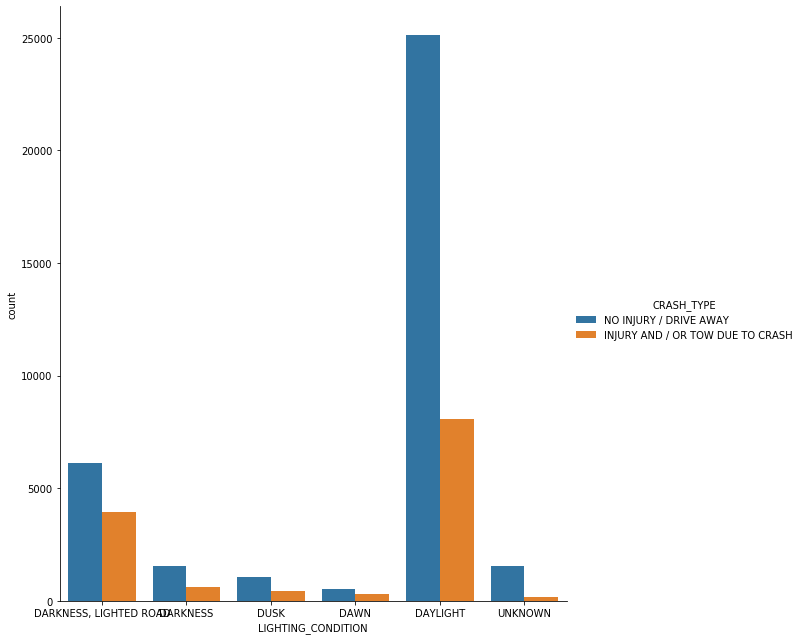

In [31]:
sns.catplot(x="LIGHTING_CONDITION", hue="CRASH_TYPE", 
              data=df, kind="count", height=9, aspect=0.9);

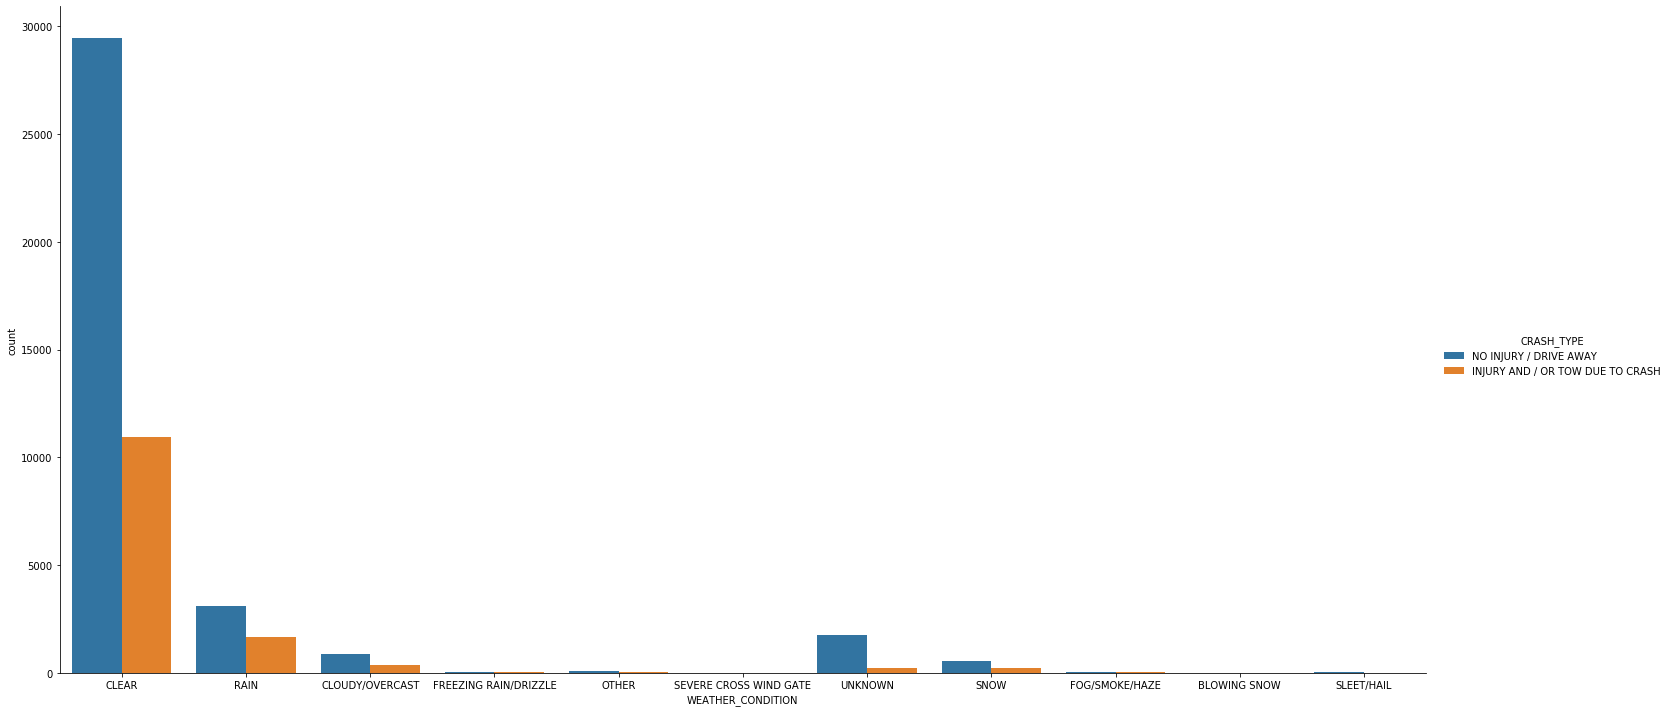

In [32]:
sns.catplot(x="WEATHER_CONDITION", hue="CRASH_TYPE",
              data=df, kind="count", height=10, aspect=2);

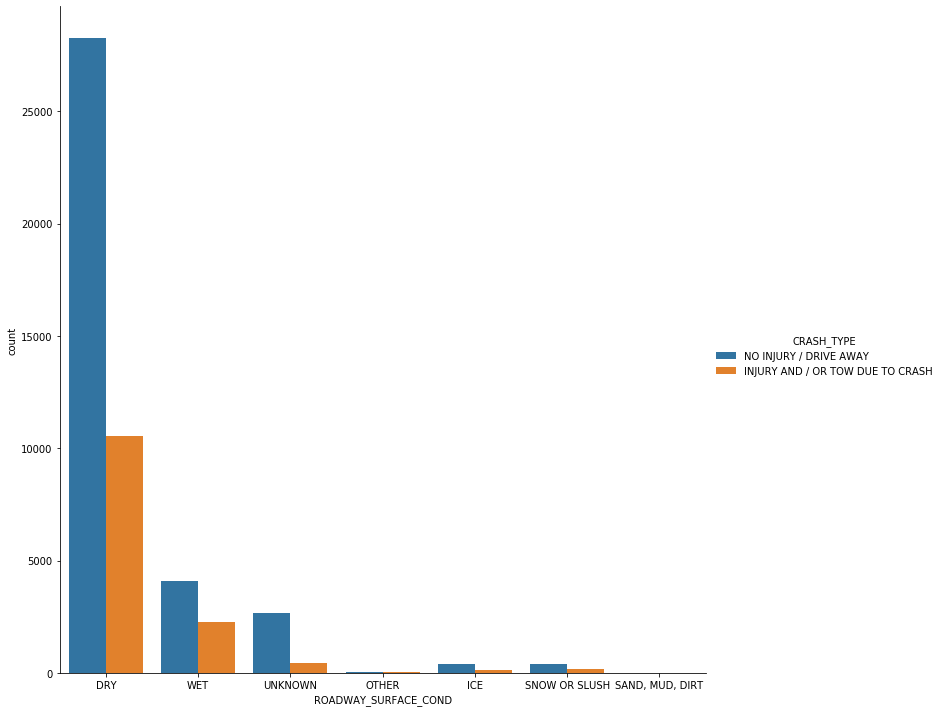

In [33]:
sns.catplot(x="ROADWAY_SURFACE_COND", hue="CRASH_TYPE",
              data=df, kind="count", height=10, aspect=1);

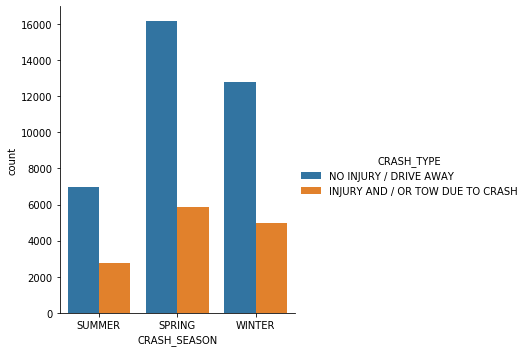

In [34]:
sns.catplot(x="CRASH_SEASON", hue="CRASH_TYPE",  data=df, kind="count", height=5, aspect=0.9);

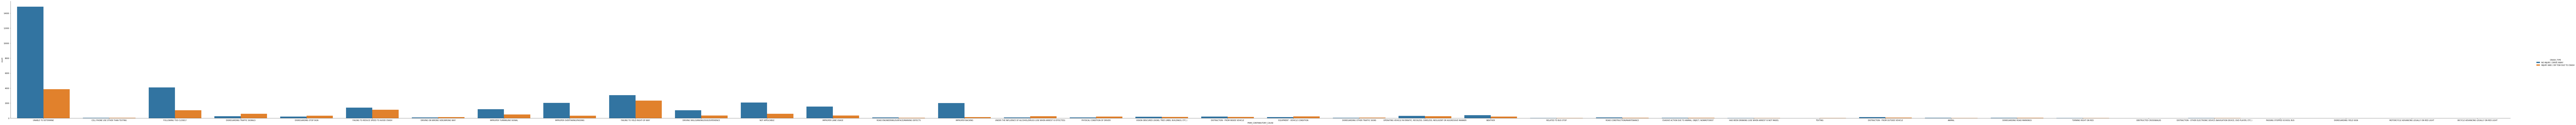

In [35]:

sns.catplot(x="PRIM_CONTRIBUTORY_CAUSE", hue="CRASH_TYPE", data=df, kind="count", height=10,aspect = 20)


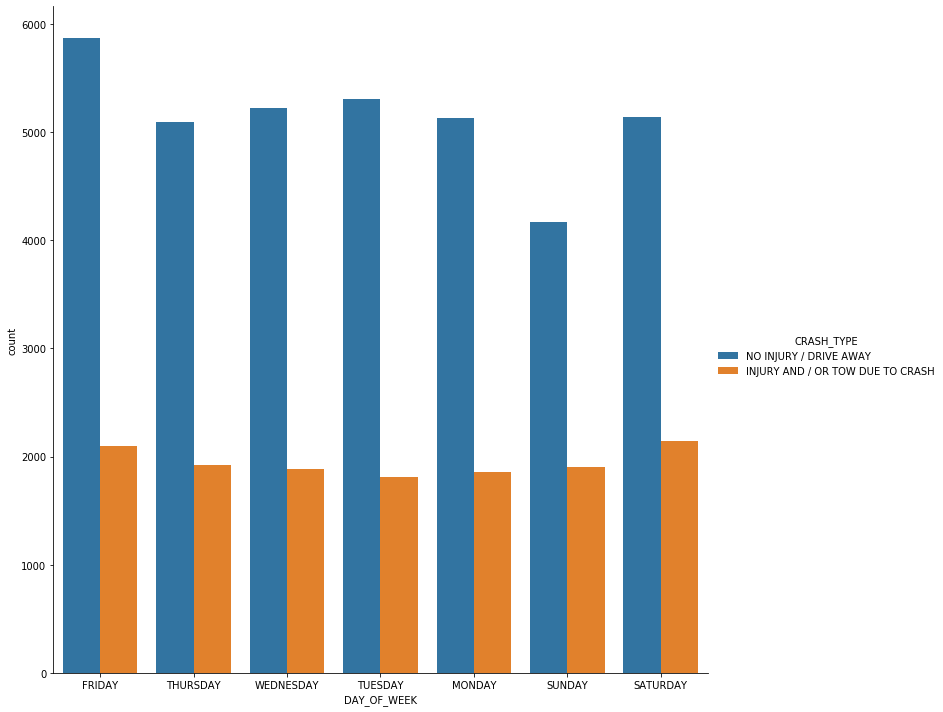

In [36]:
sns.catplot(x="DAY_OF_WEEK", hue="CRASH_TYPE" ,data=df, kind="count", height=10, aspect=1);

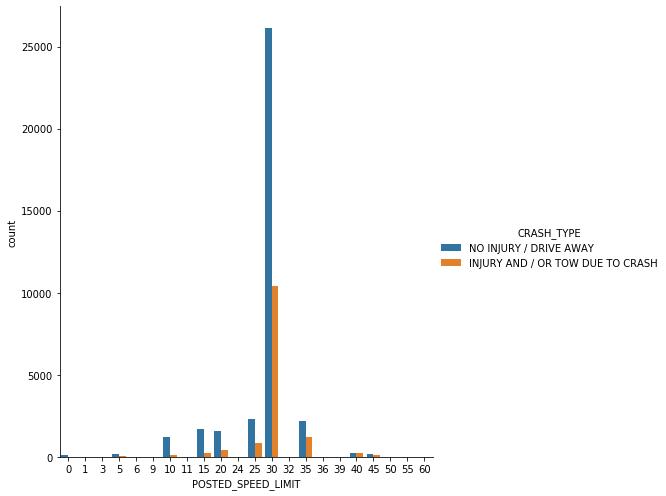

In [37]:
sns.catplot(x="POSTED_SPEED_LIMIT", hue="CRASH_TYPE", 
              data=df, kind="count", height=7, aspect=0.9);

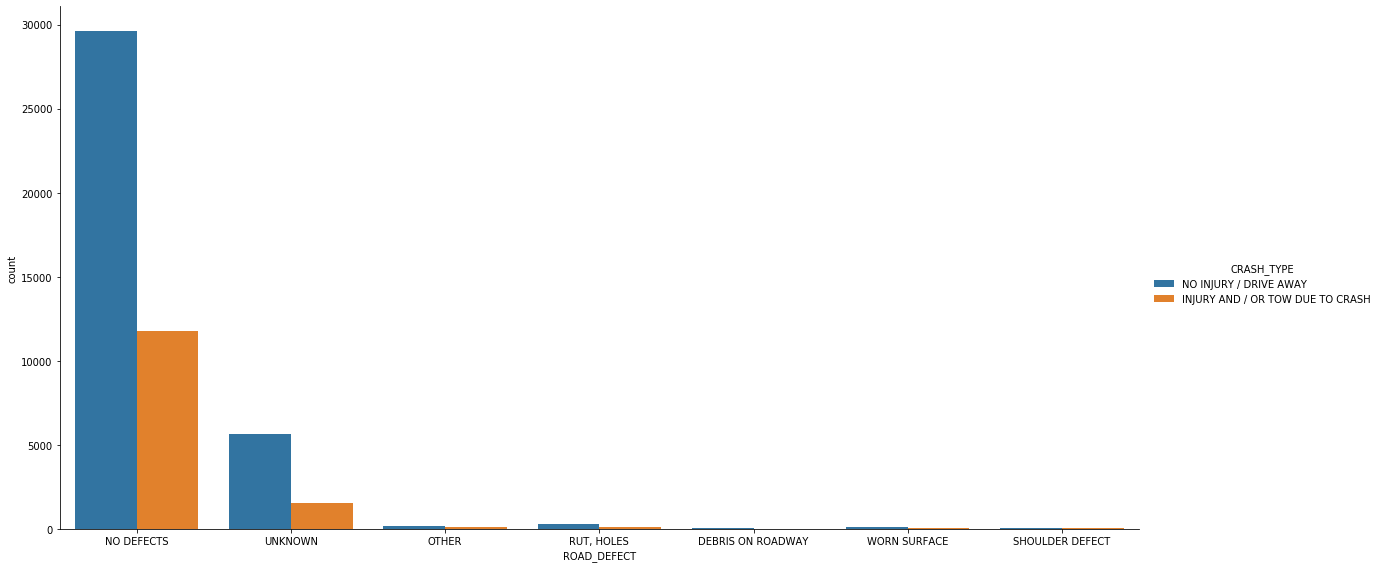

In [38]:
sns.catplot(x="ROAD_DEFECT", hue="CRASH_TYPE", 
              data=df, kind="count", height=8, aspect=2);

In [39]:
# dropping records with 'UNKNOWN' records

In [40]:
df[df['LIGHTING_CONDITION'] == 'UNKNOWN'].shape 

(1742, 13)

In [41]:
df[df['WEATHER_CONDITION'] == 'UNKNOWN'].shape 

(1996, 13)

In [42]:
df[df['ROADWAY_SURFACE_COND'] == 'UNKNOWN'].shape 

(3140, 13)

In [43]:
temp = df

In [44]:
df[df['LIGHTING_CONDITION'] == 'UNKNOWN'].index

Int64Index([ 29089,  29131,  28981,  28786,  28499,  29149,  28484,  28939,
             28393,  29156,
            ...
            345897, 340361, 350267, 338040, 347059, 350254, 339058, 349581,
            344601, 351866],
           dtype='int64', length=1742)

In [45]:
index = df[(df['LIGHTING_CONDITION'] == 'UNKNOWN') | 
           (df['WEATHER_CONDITION'] == 'UNKNOWN') |
           (df['ROADWAY_SURFACE_COND'] == 'UNKNOWN')].index
df.drop(index, inplace = True)


In [46]:
df.shape

(45807, 13)

In [47]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['POSTED_SPEED_LIMIT', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE',
        'DAY_OF_WEEK', 'CRASH_SEASON']], df[['CRASH_TYPE']], test_size=0.2, random_state=1)

# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (36645, 12) (36645, 1)
Test (9162, 12) (9162, 1)


In [48]:
X_train.columns

Index(['POSTED_SPEED_LIMIT', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'DAY_OF_WEEK', 'CRASH_SEASON'],
      dtype='object')

In [49]:
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

In [50]:
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [51]:
# if in X_train one category not found then gives error in x_test encoding

X_train_enc, X_test_enc = prepare_inputs(X_train[['WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'DAY_OF_WEEK', 'CRASH_SEASON']], X_test[['WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'DAY_OF_WEEK', 'CRASH_SEASON']])
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

C:\Users\deb10\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deb10\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature 0: 150.970664
Feature 1: 186.771309
Feature 2: 2234.696491
Feature 3: 452.662611
Feature 4: 0.049397
Feature 5: 510.067962
Feature 6: 10.237397
Feature 7: 2342.642381
Feature 8: 373.035505
Feature 9: 0.837021
Feature 10: 6.915061


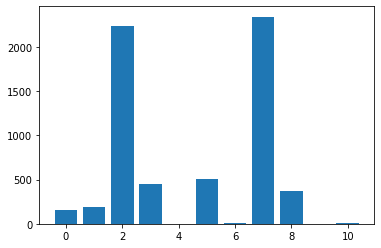

In [52]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train_enc, y_train_enc)
X_train_fs = fs.transform(X_train_enc)
X_test_fs = fs.transform(X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [53]:
# WEATHER_CONDITION 		- 0
# LIGHTING_CONDITION 		- 1
# FIRST_CRASH_TYPE 			- 2
# TRAFFICWAY_TYPE 			- 3
# ALIGNMENT 				- 4
# ROADWAY_SURFACE_COND 		- 5
# ROAD_DEFECT 				- 6
# PRIM_CONTRIBUTORY_CAUSE 	- 7
# SEC_CONTRIBUTORY_CAUSE 	- 8
# DAY_OF_WEEK 				- 9
# CRASH_SEASON				- 10

### Significant variables based on correlation matrix and Chi-square:
#### WEATHER_CONDITION
#### LIGHTING_CONDITION
#### FIRST_CRASH_TYPE
#### TRAFFICWAY_TYPE
#### ROADWAY_SURFACE_COND
#### PRIM_CONTRIBUTORY_CAUSE
#### SEC_CONTRIBUTORY_CAUSE
#### POSTED_SPEED_LIMIT


In [54]:
# create dummy before train test split

In [55]:
df_dummy = df[['POSTED_SPEED_LIMIT', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
        'ROADWAY_SURFACE_COND', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE']]

In [56]:
data_dummy = pd.get_dummies(df_dummy.iloc[:,1:])

In [57]:
# data_dummy.head()

In [58]:
final_data = pd.concat([df.iloc[:,0],data_dummy], axis = 1)

In [59]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(final_data, df[['CRASH_TYPE']], test_size=0.33, random_state=1)

# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (30690, 136) (30690, 1)
Test (15117, 136) (15117, 1)


In [60]:
y_train, y_test = prepare_targets(y_train, y_test)

C:\Users\deb10\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deb10\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.7312297413507971, 0.2687702586492029, array([0.52420882, 0.79824869]), array([0.45685997, 0.83825287]), array([0.4882227 , 0.81776183])]
F1 score (average: macro) = 0.6529922640397665
F1 score (average: weighted) = 0.7252894480748829


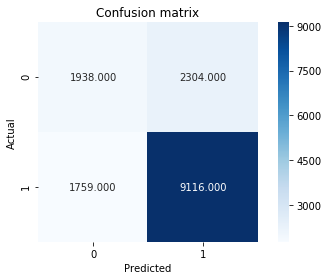

In [61]:
# evaluating with all the predictors
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

# confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

# evaluation metric
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])
print("F1 score (average: macro) = {0}".format(metrics.f1_score(y_test, y_pred, average = "macro")))
print("F1 score (average: weighted) = {0}".format(metrics.f1_score(y_test, y_pred, average = "weighted")))

[0.7340080703843355, 0.26599192961566454, array([0.53005167, 0.79956294]), array([0.45945309, 0.84110345]), array([0.49223387, 0.8198073 ])]
F1 score (average: macro) = 0.6560205862081562
F1 score (average: weighted) = 0.7278865187645048


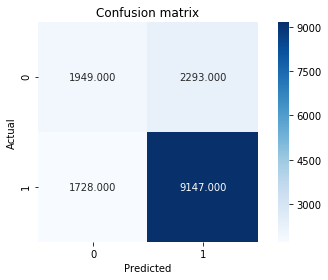

In [62]:
# evaluating with all the predictors
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 1)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

# confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

# evaluation metric
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])
print("F1 score (average: macro) = {0}".format(metrics.f1_score(y_test, y_pred, average = "macro")))
print("F1 score (average: weighted) = {0}".format(metrics.f1_score(y_test, y_pred, average = "weighted")))

[0.7336773169279619, 0.2663226830720381, array([0.52939575, 0.79926593]), array([0.45851014, 0.84101149]), array([0.4914098 , 0.81960749])]
F1 score (average: macro) = 0.65550864732075
F1 score (average: weighted) = 0.7275115337954947


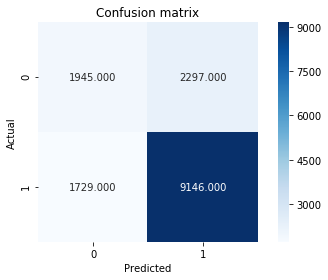

In [63]:
# evaluating with all the predictors
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 2)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

# confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

# evaluation metric
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])
print("F1 score (average: macro) = {0}".format(metrics.f1_score(y_test, y_pred, average = "macro")))
print("F1 score (average: weighted) = {0}".format(metrics.f1_score(y_test, y_pred, average = "weighted")))

[0.7264007408877423, 0.2735992591122577, array([0.51690051, 0.78123696]), array([0.38213107, 0.86068966]), array([0.43941448, 0.81904095])]
F1 score (average: macro) = 0.6292277137576044
F1 score (average: weighted) = 0.7125134986076115


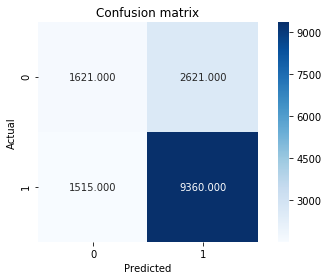

In [64]:
classifier = KNeighborsClassifier(n_neighbors=3) 

classifier.fit(X_train ,y_train)
y_pred = classifier.predict(X_test)

# confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

# evaluation metric
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])
print("F1 score (average: macro) = {0}".format(metrics.f1_score(y_test, y_pred, average = "macro")))
print("F1 score (average: weighted) = {0}".format(metrics.f1_score(y_test, y_pred, average = "weighted")))

[0.7000066150691274, 0.2999933849308726, array([0.46726257, 0.79787634]), array([0.49292786, 0.78078161]), array([0.47975221, 0.78923642])]
F1 score (average: macro) = 0.6344943130223889
F1 score (average: weighted) = 0.7023916723155166


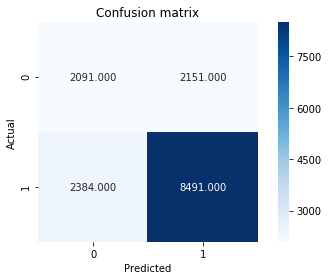

In [65]:
classifier = KNeighborsClassifier(n_neighbors=4) 

classifier.fit(X_train ,y_train)
y_pred = classifier.predict(X_test)

# confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

# evaluation metric
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])
print("F1 score (average: macro) = {0}".format(metrics.f1_score(y_test, y_pred, average = "macro")))
print("F1 score (average: weighted) = {0}".format(metrics.f1_score(y_test, y_pred, average = "weighted")))

[0.7314281934246213, 0.2685718065753787, array([0.53140097, 0.77886897]), array([0.3630363 , 0.87512644]), array([0.43137255, 0.82419676])]
F1 score (average: macro) = 0.6277846550415438
F1 score (average: weighted) = 0.713965874810248


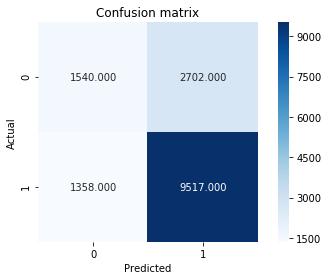

In [66]:
classifier = KNeighborsClassifier(n_neighbors=5) 

classifier.fit(X_train ,y_train)
y_pred = classifier.predict(X_test)

# confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

# evaluation metric
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])
print("F1 score (average: macro) = {0}".format(metrics.f1_score(y_test, y_pred, average = "macro")))
print("F1 score (average: weighted) = {0}".format(metrics.f1_score(y_test, y_pred, average = "weighted")))

[0.7446583316795661, 0.2553416683204339, array([0.57478465, 0.77919287]), array([0.34606318, 0.90013793]), array([0.43201883, 0.83531018])]
F1 score (average: macro) = 0.6336645073290428
F1 score (average: weighted) = 0.7221420985941576


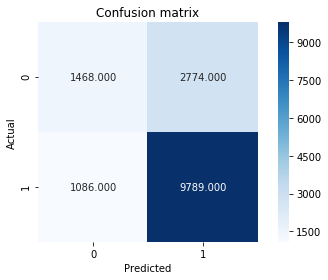

In [67]:
classifier = KNeighborsClassifier(n_neighbors=7) 

classifier.fit(X_train ,y_train)
y_pred = classifier.predict(X_test)

# confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

# evaluation metric
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])
print("F1 score (average: macro) = {0}".format(metrics.f1_score(y_test, y_pred, average = "macro")))
print("F1 score (average: weighted) = {0}".format(metrics.f1_score(y_test, y_pred, average = "weighted")))

[0.7404246874379837, 0.25957531256201627, array([0.55028463, 0.79071518]), array([0.41018388, 0.86924138]), array([0.47001621, 0.82812089])]
F1 score (average: macro) = 0.6490685505082666
F1 score (average: weighted) = 0.7276326962692953


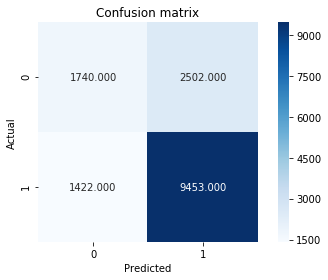

In [68]:
classifier = KNeighborsClassifier(n_neighbors=8) 

classifier.fit(X_train ,y_train)
y_pred = classifier.predict(X_test)

# confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

# evaluation metric
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])
print("F1 score (average: macro) = {0}".format(metrics.f1_score(y_test, y_pred, average = "macro")))
print("F1 score (average: weighted) = {0}".format(metrics.f1_score(y_test, y_pred, average = "weighted")))

In [69]:
df.groupby(['CRASH_TYPE'], sort=False).size().reset_index(name='Count')

,CRASH_TYPE,Count
0,NO INJURY / DRIVE AWAY,32722
1,INJURY AND / OR TOW DUE TO CRASH,13085


In [70]:
df.head()

,POSTED_SPEED_LIMIT,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,CRASH_TYPE,CRASH_SEASON,DAY_OF_WEEK
29087,35,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,UNABLE TO DETERMINE,UNABLE TO DETERMINE,NO INJURY / DRIVE AWAY,SUMMER,FRIDAY
29235,30,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,WET,NO DEFECTS,CELL PHONE USE OTHER THAN TEXTING,FAILING TO REDUCE SPEED TO AVOID CRASH,INJURY AND / OR TOW DUE TO CRASH,SUMMER,FRIDAY
29166,25,RAIN,DARKNESS,SIDESWIPE SAME DIRECTION,ONE-WAY,"CURVE, LEVEL",WET,NO DEFECTS,UNABLE TO DETERMINE,UNABLE TO DETERMINE,INJURY AND / OR TOW DUE TO CRASH,SUMMER,FRIDAY
29202,25,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,UNKNOWN,FOLLOWING TOO CLOSELY,FOLLOWING TOO CLOSELY,NO INJURY / DRIVE AWAY,SUMMER,FRIDAY
29152,35,RAIN,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,WET,NO DEFECTS,DISREGARDING TRAFFIC SIGNALS,FOLLOWING TOO CLOSELY,INJURY AND / OR TOW DUE TO CRASH,SUMMER,FRIDAY


In [71]:
X_train_clus, X_test_clus, y_train_clus, y_test_clus = train_test_split(df[['POSTED_SPEED_LIMIT', 'WEATHER_CONDITION',
                                                                            'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 
                                                                            'TRAFFICWAY_TYPE',
        'ROADWAY_SURFACE_COND', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE']], df[['CRASH_TYPE']], 
                                                                        test_size=0.20, random_state=1)

# X_train_clus, X_test_clus, y_train_clus, y_test_clus = train_test_split(df[[ 'WEATHER_CONDITION',
#        'LIGHTING_CONDITION']], df[['CRASH_TYPE']], test_size=0.33, random_state=1)

# summarize
print('Train', X_train_clus.shape, y_train_clus.shape)
print('Test', X_test_clus.shape, y_test_clus.shape)

Train (36645, 8) (36645, 1)
Test (9162, 8) (9162, 1)


In [72]:
X_train_enc_1, X_test_enc_1 = prepare_inputs(X_train_clus[[ 'WEATHER_CONDITION',
       'LIGHTING_CONDITION']],X_test_clus[[ 'WEATHER_CONDITION',
       'LIGHTING_CONDITION']])

In [73]:
y_train_enc_1, y_test_enc_1 = prepare_targets(y_train_clus, y_test_clus)

C:\Users\deb10\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deb10\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.02122311170156462, 0.8153870028064796]


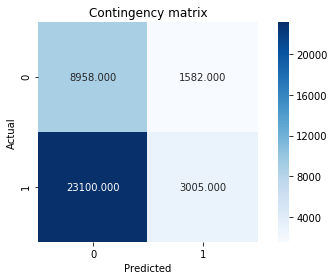

In [87]:
# CLUSTERING: KMEANS

# Combination of predictors

clustering = KMeans(n_clusters = 2, init = 'k-means++', n_init = 10, random_state=1).fit(X_train_enc_1)
clusters = clustering.labels_

cont_matrix = metrics.cluster.contingency_matrix(y_train_enc_1,clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

adjusted_rand_index = metrics.adjusted_rand_score(y_train_enc_1, clusters)
silhouette_coefficient = metrics.silhouette_score(X_train_enc_1, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])


[0.02122311170156462, 0.8153870028064796]


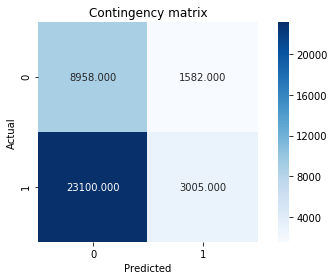

In [88]:
# CLUSTERING: KMEANS

# Combination of predictors

clustering = KMeans(n_clusters = 2, init = 'k-means++', n_init = 20, random_state=1).fit(X_train_enc_1)
clusters = clustering.labels_

cont_matrix = metrics.cluster.contingency_matrix(y_train_enc_1,clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

adjusted_rand_index = metrics.adjusted_rand_score(y_train_enc_1, clusters)
silhouette_coefficient = metrics.silhouette_score(X_train_enc_1, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])


[0.02122311170156462, 0.8153870028064796]


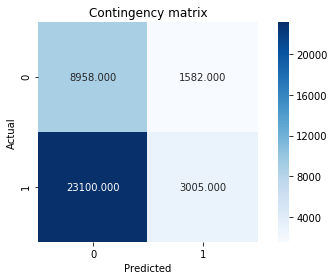

In [89]:
# CLUSTERING: KMEANS
# changinf random state is not affecting
# Combination of predictors

clustering = KMeans(n_clusters = 2, init = 'k-means++', n_init = 20, random_state=5).fit(X_train_enc_1)
clusters = clustering.labels_

cont_matrix = metrics.cluster.contingency_matrix(y_train_enc_1,clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

adjusted_rand_index = metrics.adjusted_rand_score(y_train_enc_1, clusters)
silhouette_coefficient = metrics.silhouette_score(X_train_enc_1, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])


In [90]:
X_train_enc_2, X_test_enc_2 = prepare_inputs(X_train_clus[[ 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'PRIM_CONTRIBUTORY_CAUSE']],X_test_clus[[ 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'PRIM_CONTRIBUTORY_CAUSE']])

[-0.005283281384543921, 0.7181499060905321]


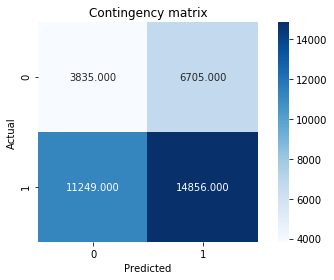

In [91]:
# CLUSTERING: KMEANS

# Combination of predictors

clustering = KMeans(n_clusters = 2, init = 'k-means++', n_init = 10, random_state=1).fit(X_train_enc_2)
clusters = clustering.labels_

cont_matrix = metrics.cluster.contingency_matrix(y_train_enc_1,clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

adjusted_rand_index = metrics.adjusted_rand_score(y_train_enc_1, clusters)
silhouette_coefficient = metrics.silhouette_score(X_train_enc_2, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])



In [100]:
X_train_enc_4, X_test_enc_4 = prepare_inputs(X_train_clus[[ 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'PRIM_CONTRIBUTORY_CAUSE']],X_test_clus[[ 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'PRIM_CONTRIBUTORY_CAUSE']])

In [101]:
X_train_enc_4.shape

(36645, 3)

In [108]:
X_train_enc_5 = np.concatenate((X_train_enc_4,X_train_clus[['POSTED_SPEED_LIMIT']]),axis = 1)
X_train_enc_5.shape

(36645, 4)

In [110]:
X_train_enc_6, X_test_enc_6 = prepare_inputs(X_train_clus[[ 'WEATHER_CONDITION',
       'LIGHTING_CONDITION']],X_test_clus[[ 'WEATHER_CONDITION',
       'LIGHTING_CONDITION']])
X_train_enc_6 = np.concatenate((X_train_enc_6,X_train_clus[['POSTED_SPEED_LIMIT']]),axis = 1)

[-0.005283281384543921, 0.5488528497243605]


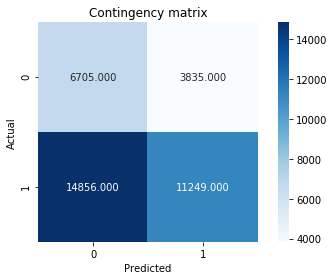

In [92]:
X_train_enc_3, X_test_enc_3 = prepare_inputs(X_train_clus[[ 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'PRIM_CONTRIBUTORY_CAUSE', 'FIRST_CRASH_TYPE']],X_test_clus[[ 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'PRIM_CONTRIBUTORY_CAUSE','FIRST_CRASH_TYPE']])

clustering = KMeans(n_clusters = 2, init = 'k-means++', n_init = 10, random_state=2).fit(X_train_enc_3)
clusters = clustering.labels_

cont_matrix = metrics.cluster.contingency_matrix(y_train_enc_1,clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

adjusted_rand_index = metrics.adjusted_rand_score(y_train_enc_1, clusters)
silhouette_coefficient = metrics.silhouette_score(X_train_enc_3, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])
# print([adjusted_rand_index])

[-0.005268566355587542, 0.577802542953598]


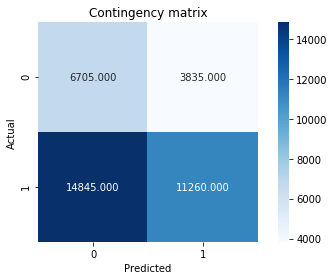

In [109]:
clustering = KMeans(n_clusters = 2, init = 'k-means++', n_init = 10, random_state=2).fit(X_train_enc_5)
clusters = clustering.labels_

cont_matrix = metrics.cluster.contingency_matrix(y_train_enc_1,clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

adjusted_rand_index = metrics.adjusted_rand_score(y_train_enc_1, clusters)
silhouette_coefficient = metrics.silhouette_score(X_train_enc_5, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])
# print([adjusted_rand_index])

[-0.03937346793950812, 0.7614401566508888]


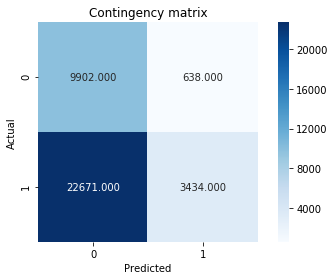

In [111]:
clustering = KMeans(n_clusters = 2, init = 'k-means++', n_init = 10, random_state=2).fit(X_train_enc_6)
clusters = clustering.labels_

cont_matrix = metrics.cluster.contingency_matrix(y_train_enc_1,clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

adjusted_rand_index = metrics.adjusted_rand_score(y_train_enc_1, clusters)
silhouette_coefficient = metrics.silhouette_score(X_train_enc_6, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])
# print([adjusted_rand_index])

In [98]:
# CLUSTERING: DBSCAN

# Combination of predictors

clustering = DBSCAN(eps = 5, min_samples = 20, metric = "euclidean").fit(X_train_enc_3)
clusters = clustering.labels_
print(clusters)
# cont_matrix = metrics.cluster.contingency_matrix(y_train_enc_1,clusters)
# sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.title('Contingency matrix')
# plt.tight_layout()

# adjusted_rand_index = metrics.adjusted_rand_score(y_train_enc_1, clusters)
# silhouette_coefficient = metrics.silhouette_score(X_train_enc_3, clusters, metric = "euclidean")
# print([adjusted_rand_index, silhouette_coefficient])


[0 0 0 ... 0 0 0]


[0 0 0 ... 0 0 0]


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

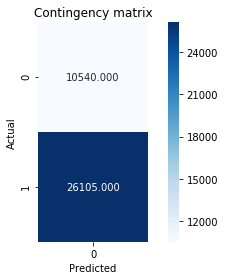

In [119]:
# CLUSTERING: DBSCAN

# Combination of predictors

clustering = DBSCAN(eps = 5, min_samples = 20, metric = "euclidean").fit(X_train_enc_2)
clusters = clustering.labels_
print(clusters)
cont_matrix = metrics.cluster.contingency_matrix(y_train_enc_1,clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

adjusted_rand_index = metrics.adjusted_rand_score(y_train_enc_1, clusters)
silhouette_coefficient = metrics.silhouette_score(X_train_enc_2, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])
